In [2]:
from sklearn import metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
contador = 0
dataRfAuc=[]
dataRfPrecision=[]
dataRfRecall=[]
dataRfF1=[]
while(contador < 1000):
    true = open('./DATA/s7/yTestRf'+str(contador + 1))
    y_test = []
    for linha in true:
        y_test +=[int(linha)]
        
    pred = open('./DATA/s7/yPredRf'+str(contador + 1))
    ypred = []
    for linha in pred:
        ypred +=[int(linha)]
        
    dataRfF1+=[metrics.f1_score(y_test,ypred)]
    dataRfRecall+=[metrics.recall_score(y_test,ypred)]
    dataRfPrecision+=[metrics.precision_score(y_test,ypred)]
    dataRfAuc+=[metrics.accuracy_score(y_test,ypred)]
    
    contador +=1

In [53]:
contador = 0
dataXGBAuc=[]
dataXGBPrecision=[]
dataXGBRecall=[]
dataXGBF1=[]
while(contador < 1000):
    true = open('./DATA/s7/yTestXGB'+str(contador + 1))
    y_test = []
    for linha in true:
        y_test +=[int(linha)]
        
    pred = open('./DATA/s7/yPredXGB'+str(contador + 1))
    ypred = []
    for linha in pred:
        ypred +=[int(linha)]
        
    dataXGBF1+=[metrics.f1_score(y_test,ypred)]
    dataXGBRecall+=[metrics.recall_score(y_test,ypred)]
    dataXGBPrecision+=[metrics.precision_score(y_test,ypred)]
    dataXGBAuc+=[metrics.accuracy_score(y_test,ypred)]
    
    contador +=1

In [54]:
contador = 0
dataETCAuc=[]
dataETCPrecision=[]
dataETCRecall=[]
dataETCF1=[]
while(contador < 1000):
    true = open('./DATA/s7/yTestETC'+str(contador + 1))
    y_test = []
    for linha in true:
        y_test +=[int(linha)]
        
    pred = open('./DATA/s7/yPredETC'+str(contador + 1))
    ypred = []
    for linha in pred:
        ypred +=[int(linha)]
        
    dataETCF1+=[metrics.f1_score(y_test,ypred)]
    dataETCRecall+=[metrics.recall_score(y_test,ypred)]
    dataETCPrecision+=[metrics.precision_score(y_test,ypred)]
    dataETCAuc+=[metrics.accuracy_score(y_test,ypred)]
    
    contador +=1

In [55]:
contador = 0
dataSVCAuc=[]
dataSVCPrecision=[]
dataSVCRecall=[]
dataSVCF1=[]
while(contador < 1000):
    true = open('./DATA/s7/yTestSVC'+str(contador + 1))
    y_test = []
    for linha in true:
        y_test +=[int(linha)]
        
    pred = open('./DATA/s7/yPredSVC'+str(contador + 1))
    ypred = []
    for linha in pred:
        ypred +=[int(linha)]
        
    dataSVCF1+=[metrics.f1_score(y_test,ypred)]
    dataSVCRecall+=[metrics.recall_score(y_test,ypred)]
    dataSVCPrecision+=[metrics.precision_score(y_test,ypred)]
    dataSVCAuc+=[metrics.accuracy_score(y_test,ypred)]
    
    contador +=1

In [56]:
d = {
    'acc':[dataRfAuc, dataXGBAuc, dataETCAuc, dataSVCAuc],
    'f1':[dataRfF1, dataXGBF1, dataETCF1, dataSVCF1],
    'recall':[dataRfRecall, dataXGBRecall, dataETCRecall, dataSVCRecall],
    'precision':[dataRfPrecision, dataXGBPrecision, dataETCPrecision, dataSVCPrecision],
}

In [57]:
df = pd.DataFrame()
for metric,performance in d.items():
    df[metric+'_RF']  = performance[0]
    df[metric+'_XGB'] = performance[1]
    df[metric+'_ETC'] = performance[2]
    df[metric+'_SVC'] = performance[3]
df.head()

,acc_RF,acc_XGB,acc_ETC,acc_SVC,f1_RF,f1_XGB,f1_ETC,f1_SVC,recall_RF,recall_XGB,recall_ETC,recall_SVC,precision_RF,precision_XGB,precision_ETC,precision_SVC
0,0.940767,0.951220,0.940767,0.958188,0.935849,0.946970,0.937729,0.955882,0.905109,0.912409,0.934307,0.948905,0.968750,0.984252,0.941176,0.962963
1,0.947735,0.954704,0.937282,0.947735,0.946237,0.953737,0.937063,0.946996,0.963504,0.978102,0.978102,0.978102,0.929577,0.930556,0.899329,0.917808
2,0.951049,0.954545,0.930070,0.947552,0.949640,0.953405,0.929078,0.946619,0.970588,0.977941,0.963235,0.977941,0.929577,0.930070,0.897260,0.917241
3,0.933566,0.923077,0.926573,0.919580,0.928839,0.918519,0.924188,0.916364,0.911765,0.911765,0.941176,0.926471,0.946565,0.925373,0.907801,0.906475
4,0.958042,0.951049,0.940559,0.944056,0.956204,0.948529,0.939068,0.942446,0.963235,0.948529,0.963235,0.963235,0.949275,0.948529,0.916084,0.922535


In [58]:
newDataframe = [["RandomForestClassifier", "XGBClassifier", "ExtraTreesClassifier", "SVC", "Method"]]
for i in range(1, 16):
    if (i % 2 != 0):
        aux = []
        for cada in df.iloc[:, i - 1:i + 3].values:
            if (i == 1):
                aux +=[[cada[0], cada[1], cada[2], cada[3], "Accuracy"]]
            if (i == 5):
                aux +=[[cada[0], cada[1], cada[2], cada[3], "F1-Score"]]
            if (i == 9):
                aux +=[[cada[0], cada[1], cada[2], cada[3], "Recall"]]
            if (i == 13):
                aux +=[[cada[0], cada[1], cada[2], cada[3], "Precision"]]
        newDataframe +=aux
df = pd.DataFrame(newDataframe)
df.to_csv('correct.csv', header=None, index=None)
df = pd.read_csv("correct.csv")

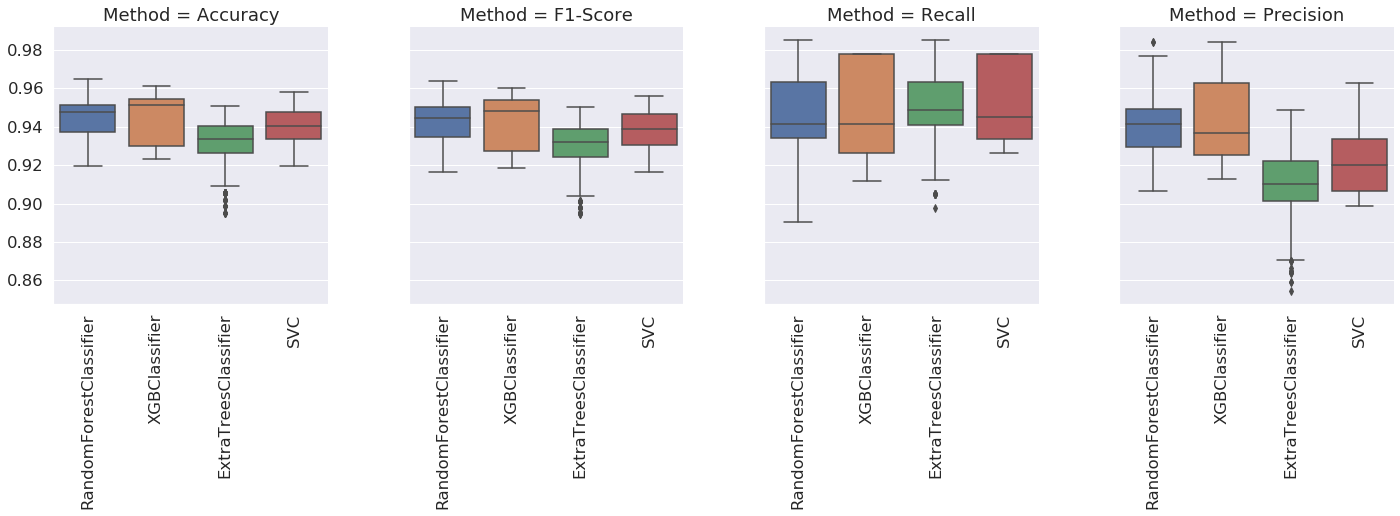

In [59]:
g = sns.catplot(col = df.columns.values[-1],
                kind="box",
                data=df)
g.set_xticklabels(rotation = 90)
sns.set(font_scale = 1.5)
plt.savefig('s7.pdf', format='pdf',bbox_inches='tight');